# Proyek Analisis Data: Air Quality
- **Nama:** Rico Mesias Tamba
- **Email:** rico.mesias.tamba.tik22@mhsw.pnj.ac.id


## Menentukan Pertanyaan Bisnis

* Pada jam berapa konsentrasi polutan cenderung mencapai puncaknya?
* Stasiun manakah yang memiliki rata-rata konsentrasi NO2 tertinggi selama satu tahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Dataset yang digunakan dalam proyek analisis data ini adalah kumpulan data kualitas udara. Folder yang diunggah ke Google Drive berisi dua belas file CSV yang mencakup data kualitas udara dari dua belas distrik selama lima tahun, mulai dari 1 Maret 2013 hingga 28 Februari 2017.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Kode ini bertujuan untuk membaca beberapa file CSV yang berada dalam folder di Google Drive, kemudian menyimpannya sebagai DataFrame untuk dianalisis. Pertama, variabel `data_path` mendefinisikan jalur folder tempat file CSV disimpan. Dengan menggunakan fungsi `os.listdir()`, kode ini membuat daftar semua file di folder tersebut dan menyimpan nama-nama file ke dalam variabel `dataset_list`. Kemudian, loop `for` digunakan untuk memeriksa setiap file dalam daftar, dan jika file tersebut berformat CSV (dengan ekstensi '.csv'), file tersebut dibaca menggunakan `pandas.read_csv()` dan ditambahkan ke dalam list `dataframes`. Pada akhirnya, setiap DataFrame dalam `dataframes` diuraikan ke dalam variabel terpisah sesuai nama distrik, seperti `gucheng_data`, `guanyuan_data`, hingga `huairou_data`, masing-masing mewakili dataset kualitas udara dari distrik tersebut.

In [3]:
data_path = '/content/drive/MyDrive/Fisika/PRSA_Data_20130301-20170228'

# List semua file CSV di folder
dataset_list = os.listdir(data_path)
dataframes = []

# Baca setiap file CSV dan simpan dalam list dataframes
for filename in dataset_list:
    if filename.endswith('.csv'):
        file_path = os.path.join(data_path, filename)
        dataframes.append(pd.read_csv(file_path))

dataset_list

gucheng_data, guanyuan_data, dongsi_data, dingling_data, changping_data, aotizhongxin_data, wanshouxigong_data, wanliu_data, tiantan_data, shunyi_data, nongzhanguan_data, huairou_data = dataframes

### Assessing Data

Kode pada tiap bagian disini akan melakukan tiga operasi penting pada setiap DataFrame yang mewakili data kualitas udara dari berbagai distrik. Pertama, dengan menjalankan **`.info()`**, kode akan memberikan ringkasan struktur dataset, termasuk jumlah baris, kolom, tipe data masing-masing kolom, dan jumlah nilai yang tidak kosong. Ini membantu memahami bentuk dasar dan integritas data. Kedua, **`.isna().sum()`** akan menghitung jumlah nilai yang hilang (*missing values*) di setiap kolom, memberikan wawasan mengenai seberapa banyak data yang tidak terisi dan mungkin memerlukan penanganan lebih lanjut. Ketiga, **`.duplicated().sum()`** memeriksa jumlah baris duplikat dalam dataset. Adanya duplikasi dapat mengganggu hasil analisis, sehingga informasi ini berguna untuk mengidentifikasi apakah ada data yang harus dibersihkan. Operasi yang sama akan diterapkan juga pada dataset lain seperti `guanyuan_data`, `dongsi_data`, dan distrik lainnya untuk memastikan kualitas data sebelum memulai analisis.

**GUCHENG**

In [4]:
gucheng_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [5]:
gucheng_data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,779
PM10,656
SO2,730
NO2,1234
CO,2012


In [6]:
gucheng_data.duplicated().sum()

0

**GUANYUAN**

In [7]:
guanyuan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [8]:
guanyuan_data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,925
PM10,718
SO2,935
NO2,1023
CO,1776


In [9]:
guanyuan_data.duplicated().sum()

0

**DONGSI**

In [10]:
dongsi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [11]:
dongsi_data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,750
PM10,553
SO2,663
NO2,1601
CO,3197


In [12]:
dongsi_data.duplicated().sum()

0

**DINGLING**

In [13]:
dingling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [14]:
dingling_data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,774
PM10,582
SO2,628
NO2,667
CO,1521


In [15]:
dingling_data.duplicated().sum()

0

**CHANGPING**

In [16]:
changping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [17]:
changping_data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,696
PM10,484
SO2,669
NO2,754
CO,1297


In [18]:
changping_data.duplicated().sum()

0

**AOTIZHONGXIN**

In [19]:
aotizhongxin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [20]:
aotizhongxin_data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,913
PM10,548
SO2,1296
NO2,1365
CO,2178


In [21]:
aotizhongxin_data.duplicated().sum()

0

**WANSHOUXIGONG**

In [22]:
wanshouxigong_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [23]:
wanshouxigong_data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,616
PM10,429
SO2,474
NO2,659
CO,1753


In [24]:
wanshouxigong_data.duplicated().sum()

0

**WANLIU**

In [25]:
wanliu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [26]:
wanliu_data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,953
PM10,777
SO2,980
NO2,1639
CO,1422


In [27]:
wanliu_data.duplicated().sum()

0

**TIANTIAN**

In [28]:
tiantan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [29]:
tiantan_data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,382
PM10,284
SO2,575
NO2,1070
CO,1812


In [30]:
tiantan_data.duplicated().sum()

0

**SHUNYI**

In [31]:
shunyi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [32]:
shunyi_data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,646
PM10,381
SO2,507
NO2,668
CO,1401


In [33]:
shunyi_data.duplicated().sum()

0

**NONZHANGUAN**

In [34]:
nongzhanguan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [35]:
nongzhanguan_data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,628
PM10,440
SO2,446
NO2,692
CO,1206


In [36]:
nongzhanguan_data.duplicated().sum()

0

**HUAIROU**

In [37]:
huairou_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [38]:
huairou_data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,677
PM10,597
SO2,1118
NO2,744
CO,1126


In [39]:
huairou_data.duplicated().sum()

0

### Cleaning Data

Dari hasil pemeriksaan terhadap setiap DataFrame, tidak ditemukan adanya duplikasi data dalam dataset. Namun, terdapat beberapa nilai kosong pada kolom-kolom yang mengukur parameter kualitas udara seperti **PM2.5**, **PM10**, **SO2**, **NO2**, **CO**, **O3**, serta variabel meteorologi seperti **TEMP**, **PRES**, **DEWP**, **RAIN**, **wd**, dan **WSPM**. Sementara itu, kolom yang berkaitan dengan identifikasi waktu dan lokasi, seperti **no**, **year**, **month**, **day**, **hour**, dan **station**, tidak mengandung nilai kosong. Sebelum melanjutkan ke proses pembersihan data, contoh dari dataset dapat dilihat menggunakan fungsi **`head()`**, yang menampilkan beberapa baris pertama dari setiap DataFrame, untuk mendapatkan gambaran umum mengenai struktur dan isi data tersebut (Disini saya menampilkan semuanya, untuk mengakses saya berikan comment pada baris code yang tidak perlu diakses).

In [40]:
gucheng_data.head(10)
guanyuan_data.head(10)
dongsi_data.head(10)
dingling_data.head(10)
changping_data.head(10)
aotizhongxin_data.head(10)
wanshouxigong_data.head(10)
wanliu_data.head(10)
tiantan_data.head(10)
shunyi_data.head(10)
nongzhanguan_data.head(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan
5,6,2013,3,1,5,3.0,3.0,13.0,21.0,300.0,77.0,-2.4,1027.5,-21.3,0.0,NW,2.4,Nongzhanguan
6,7,2013,3,1,6,4.0,4.0,15.0,32.0,300.0,62.0,-2.5,1028.2,-20.4,0.0,NW,2.2,Nongzhanguan
7,8,2013,3,1,7,3.0,7.0,14.0,45.0,400.0,48.0,-1.4,1029.5,-20.4,0.0,NNW,3.0,Nongzhanguan
8,9,2013,3,1,8,3.0,6.0,13.0,49.0,400.0,46.0,-0.3,1030.4,-21.2,0.0,NW,4.6,Nongzhanguan
9,10,2013,3,1,9,11.0,14.0,9.0,28.0,400.0,68.0,0.4,1030.5,-23.3,0.0,N,5.5,Nongzhanguan


Setiap kolom dalam dataset memiliki variasi data yang berbeda-beda. Untuk kolom-kolom yang memiliki nilai kosong, hampir semuanya berisi data numerik, kecuali kolom **wd**. Untuk mengisi bagian-bagian yang kosong, saya menggunakan teknik interpolasi. Saya menerapkan fungsi **`interpolate()`** pada setiap DataFrame, dengan menggunakan metode interpolasi linier. Metode ini mengisi nilai kosong secara linier, berdasarkan nilai yang ada sebelum dan sesudahnya, sehingga menghasilkan data yang lebih lengkap dan konsisten.

In [41]:
gucheng_data = gucheng_data.interpolate(method='linear')
guanyuan_data = guanyuan_data.interpolate(method='linear')
dongsi_data = dongsi_data.interpolate(method='linear')
dingling_data = dingling_data.interpolate(method='linear')
changping_data = changping_data.interpolate(method='linear')
aotizhongxin_data = aotizhongxin_data.interpolate(method='linear')
wanshouxigong_data = wanshouxigong_data.interpolate(method='linear')
wanliu_data = wanliu_data.interpolate(method='linear')
tiantan_data = tiantan_data.interpolate(method='linear')
shunyi_data = shunyi_data.interpolate(method='linear')
nongzhanguan_data = nongzhanguan_data.interpolate(method='linear')

<ipython-input-41-37a0c39c8ed1>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  gucheng_data = gucheng_data.interpolate(method='linear')
<ipython-input-41-37a0c39c8ed1>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  guanyuan_data = guanyuan_data.interpolate(method='linear')
<ipython-input-41-37a0c39c8ed1>:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  dongsi_data = dongsi_data.interpolate(method='linear')
<ipython-input-41-37a0c39c8ed1>:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  d

Jumlah data yang hilang pada kolom **wd** bervariasi, dengan rentang antara 78 hingga 483 nilai kosong. Untuk menangani kekosongan ini, saya menggunakan teknik imputasi, mengisi nilai yang hilang dengan data yang paling sering muncul (modus) dalam kolom tersebut. Untuk menentukan nilai tersebut, saya memanfaatkan fungsi **`value_counts()`** yang memungkinkan saya melihat frekuensi kemunculan setiap nilai dalam kolom, lalu memilih nilai yang paling dominan di setiap DataFrame.

In [42]:
gucheng_data['wd'].value_counts()

,count
wd,
NNW,4776
NW,3838
N,3777
WNW,2877
ESE,2786
E,2427
NNE,1919
SSE,1853
SE,1823


Berdasarkan informasi yang ditampilkan, diketahui bahwa nilai **NNW** adalah modus dari kolom **wd** pada DataFrame Gucheng. Bagian kosong dalam kolom tersebut kemudian saya isi menggunakan fungsi **`fillna()`** dengan nilai **NNW**. Setelah proses imputasi selesai, pemeriksaan lebih lanjut dengan menggunakan fungsi **`isna()`** dan **`sum()`** menunjukkan bahwa tidak ada lagi data kosong di DataFrame Gucheng.

In [43]:
gucheng_data['wd'].fillna(value='N', inplace=True)

<ipython-input-43-307857098477>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gucheng_data['wd'].fillna(value='N', inplace=True)


In [44]:
gucheng_data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,2
CO,0


In [45]:
guanyuan_data['wd'].value_counts()

,count
wd,
NE,5140
ENE,3950
SW,3359
E,2608
NNE,2445
WSW,2212
SSW,2098
N,2066
NW,1860


In [46]:
guanyuan_data['wd'].fillna(value='NE', inplace=True)

<ipython-input-46-cda841a54df4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  guanyuan_data['wd'].fillna(value='NE', inplace=True)


In [47]:
guanyuan_data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [48]:
dongsi_data['wd'].value_counts()

,count
wd,
ENE,3861
E,3564
NE,3540
ESE,2706
SW,2481
NW,2466
SSW,1953
NNE,1928
SE,1880


In [49]:
dongsi_data['wd'].fillna(value='ENE', inplace=True)

<ipython-input-49-d0d5a93a653f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dongsi_data['wd'].fillna(value='ENE', inplace=True)


In [50]:
dongsi_data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [51]:
dingling_data['wd'].value_counts()

,count
wd,
NNW,4776
NW,3838
N,3777
WNW,2877
ESE,2786
E,2427
NNE,1919
SSE,1853
SE,1823


In [52]:
dingling_data['wd'].fillna(value='NNW', inplace=True)

<ipython-input-52-e87b6f59e055>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dingling_data['wd'].fillna(value='NNW', inplace=True)


In [53]:
dingling_data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [54]:
changping_data['wd'].value_counts()

,count
wd,
NE,3568
SW,3428
ENE,3080
E,2807
WNW,2565
NW,2552
WSW,2546
W,2464
SSW,2457


In [55]:
changping_data['wd'].fillna(value='NNW', inplace=True)

<ipython-input-55-db2f834704c5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  changping_data['wd'].fillna(value='NNW', inplace=True)


In [56]:
changping_data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [57]:
aotizhongxin_data['wd'].value_counts()

,count
wd,
NNE,4540
N,3877
NE,3351
SSE,2963
SE,2665
S,2613
NW,2446
WNW,2051
NNW,1656


In [58]:
aotizhongxin_data['wd'].fillna(value='NE', inplace=True)

<ipython-input-58-d1933ee8dc60>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aotizhongxin_data['wd'].fillna(value='NE', inplace=True)


In [59]:
aotizhongxin_data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [60]:
wanshouxigong_data['wd'].value_counts()

,count
wd,
NE,5140
ENE,3950
SW,3359
E,2608
NNE,2445
WSW,2212
SSW,2098
N,2066
NW,1860


In [61]:
wanshouxigong_data['wd'].fillna(value='NE', inplace=True)

<ipython-input-61-41250f6185f0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wanshouxigong_data['wd'].fillna(value='NE', inplace=True)


In [62]:
wanshouxigong_data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [63]:
wanliu_data['wd'].value_counts()

,count
wd,
NW,4943
WNW,4876
NE,2252
E,2159
W,2138
SE,2113
ENE,2026
ESE,2022
SW,1797


In [64]:
wanliu_data['wd'].fillna(value='NE', inplace=True)

<ipython-input-64-ff251a6cd3d2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wanliu_data['wd'].fillna(value='NE', inplace=True)


In [65]:
wanliu_data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [66]:
tiantan_data['wd'].value_counts()

,count
wd,
NE,6703
SW,4644
ENE,3642
NNE,3327
N,3219
WSW,2529
SSW,2101
NNW,1397
W,1335


In [67]:
tiantan_data['wd'].fillna(value='ENE', inplace=True)

<ipython-input-67-a72fad4f2607>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tiantan_data['wd'].fillna(value='ENE', inplace=True)


In [68]:
tiantan_data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [69]:
shunyi_data['wd'].value_counts()

,count
wd,
N,3949
NE,3119
SSW,2762
NW,2758
NNE,2602
S,2343
W,2331
WNW,2073
SW,1993


In [70]:
shunyi_data['wd'].fillna(value='NNE', inplace=True)

<ipython-input-70-5961fdf7d5c3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  shunyi_data['wd'].fillna(value='NNE', inplace=True)


In [71]:
shunyi_data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,20
CO,0


In [72]:
nongzhanguan_data['wd'].value_counts()

,count
wd,
ENE,3861
E,3564
NE,3540
ESE,2706
SW,2481
NW,2466
SSW,1953
NNE,1928
SE,1880


In [73]:
nongzhanguan_data['wd'].fillna(value='ENE', inplace=True)

<ipython-input-73-72975ea4868a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nongzhanguan_data['wd'].fillna(value='ENE', inplace=True)


In [74]:
nongzhanguan_data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


## Exploratory Data Analysis (EDA)

### Explore all_data

Untuk memudahkan dalam menjawab pertanyaan yang telah saya susun, saya membuat sebuah DataFrame bernama **all_data** yang merupakan kombinasi dari semua DataFrame yang mewakili setiap stasiun.

In [75]:
all_data = pd.concat([gucheng_data, guanyuan_data, dongsi_data, dingling_data, changping_data,
                      aotizhongxin_data, wanshouxigong_data, wanliu_data, tiantan_data,
                      shunyi_data, nongzhanguan_data, huairou_data], ignore_index=True)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

**Pada jam berapa konsentrasi polutan cenderung mencapai puncaknya?**

Untuk menjawab pernyataan tersebut, saya telah membuat kode yang mengelompokkan data berdasarkan jam dan menghitung rata-rata konsentrasi polutan. Kode tersebut menghasilkan DataFrame hourly_avg, yang mencakup rata-rata konsentrasi polutan seperti PM2.5, PM10, SO2, NO2, CO, dan O3 untuk setiap jam.

In [76]:
# Mengelompokkan data berdasarkan jam dan menghitung rata-rata konsentrasi polutan
hourly_avg = all_data.groupby('hour')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

saya juga membuat plot untuk setiap polutan untuk menggambarkan bagaimana konsentrasi polutan tersebut berubah sepanjang hari. Dengan visualisasi ini, kita dapat mengidentifikasi jam-jam di mana konsentrasi polutan cenderung mencapai puncaknya.

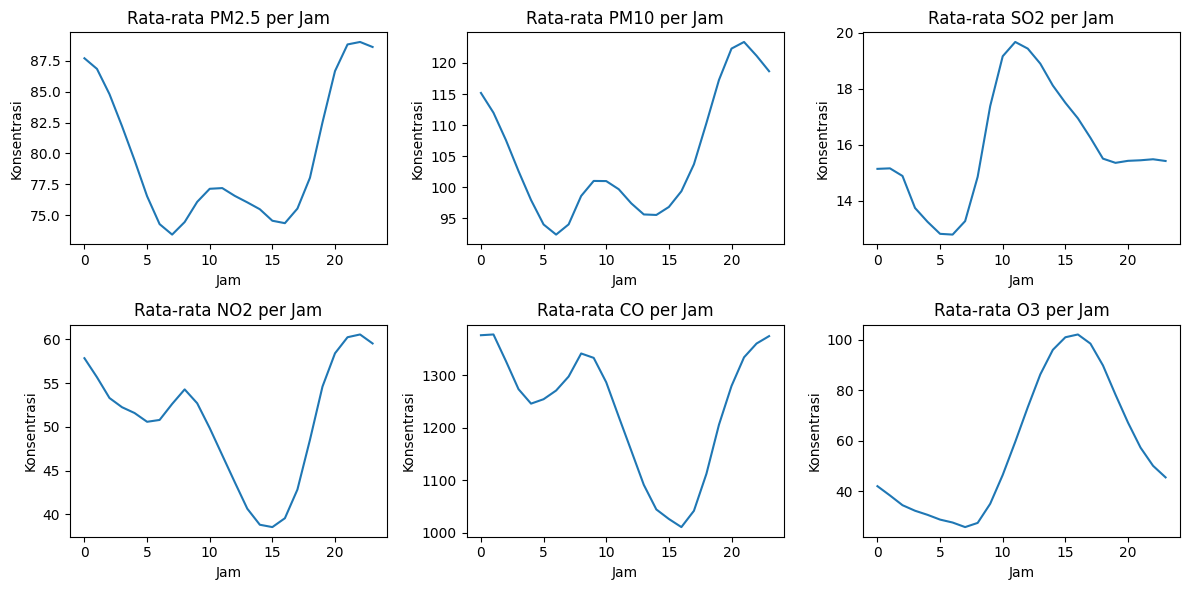

In [77]:
# Membuat plot untuk setiap polutan
plt.figure(figsize=(12, 6))
for i, col in enumerate(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']):
  plt.subplot(2, 3, i+1)
  plt.plot(hourly_avg.index, hourly_avg[col])
  plt.title(f'Rata-rata {col} per Jam')
  plt.xlabel('Jam')
  plt.ylabel('Konsentrasi')

plt.tight_layout()
plt.show()

### Pertanyaan 2:

**Stasiun manakah yang rata-rata konsentrasi polutan NO2 paling tinggi?**



Untuk menjawab pernyataan tersebut, saya telah membuat kode yang menghitung rata-rata konsentrasi NO2 untuk setiap stasiun. Kode ini juga mencari stasiun dengan rata-rata konsentrasi NO2 tertinggi dan menampilkan nilai tersebut.

In [78]:
station_avg_no2 = all_data.groupby('station')['NO2'].mean()

highest_avg_no2_station = station_avg_no2.idxmax()
highest_avg_no2_value = station_avg_no2.max()
print(f"Stasiun dengan rata-rata konsentrasi NO2 tertinggi adalah {highest_avg_no2_station} dengan nilai {highest_avg_no2_value}")

Stasiun dengan rata-rata konsentrasi NO2 tertinggi adalah Wanliu dengan nilai 65.6684183307666


Selain itu, saya menyajikan visualisasi menggunakan diagram batang yang menggambarkan konsentrasi NO2 per stasiun.

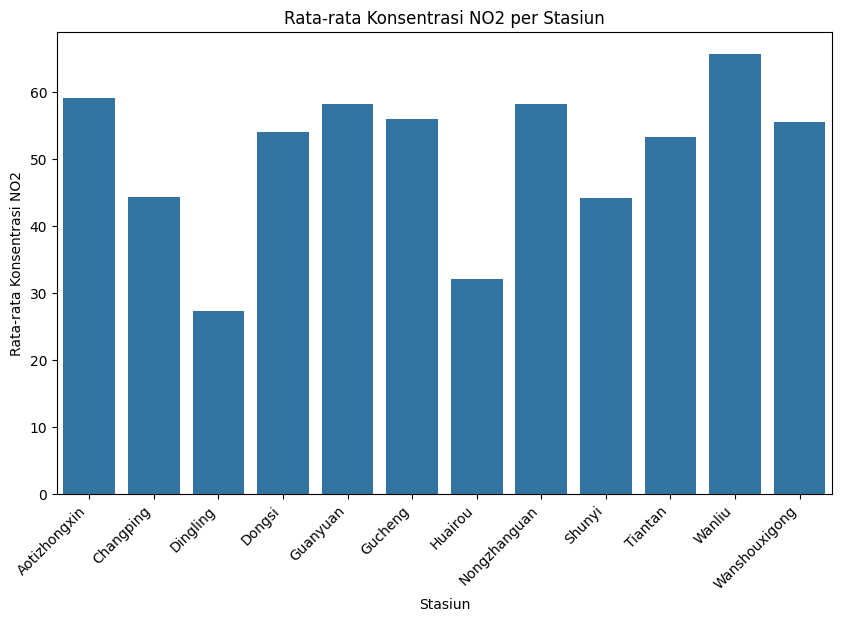

In [79]:
# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=station_avg_no2.index, y=station_avg_no2.values)
plt.title('Rata-rata Konsentrasi NO2 per Stasiun')
plt.xlabel('Stasiun')
plt.ylabel('Rata-rata Konsentrasi NO2')
plt.xticks(rotation=45, ha='right')
plt.show()


## Conclusion

- Hasil dari analisa dan visualisasi data menunjukkan bahwa beberapa wilayah memiliki kecenderungan kenaikan polusi udara pada waktu malam hari
- Hasil dari analisa dan visualisasi menunjukkan bahwa stasiun dengan konsentrasi NO2 tertinggi adalah Wanliu